## PerScholas Capstone
#### Ndugba, Ogo

In [1]:
#imports
import findspark
findspark.add_packages('mysql:mysql-connector-java:8.0.11')
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import*

import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

# Accessing the Loan API endpoint

In [2]:
#getting the data via API
url = 'https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json'
response = requests.get(url)
data = response.json()
data

[{'Application_ID': 'LP001002',
  'Gender': 'Male',
  'Married': 'No',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'medium',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001003',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '1',
  'Education': 'Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Rural',
  'Income': 'medium',
  'Application_Status': 'N'},
 {'Application_ID': 'LP001005',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Graduate',
  'Self_Employed': 'Yes',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Application_ID': 'LP001006',
  'Gender': 'Male',
  'Married': 'Yes',
  'Dependents': '0',
  'Education': 'Not Graduate',
  'Self_Employed': 'No',
  'Credit_History': 1,
  'Property_Area': 'Urban',
  'Income': 'low',
  'Application_Status': 'Y'},
 {'Applica

In [3]:
#status code to verify request was successful
print(response.status_code)

200


In [4]:
#creating SparkSession 
spark = SparkSession.builder.master("local[1]").appName("Loan").getOrCreate()

:: loading settings :: url = jar:file:/Users/purple/opt/anaconda3/envs/ps_capstone/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/purple/.ivy2/cache
The jars for the packages stored in: /Users/purple/.ivy2/jars
mysql#mysql-connector-java added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-659b8f0c-9a8f-41fb-97d6-80fc806b20ca;1.0
	confs: [default]
	found mysql#mysql-connector-java;8.0.11 in central
	found com.google.protobuf#protobuf-java;2.6.0 in central
:: resolution report :: resolve 173ms :: artifacts dl 10ms
	:: modules in use:
	com.google.protobuf#protobuf-java;2.6.0 from central in [default]
	mysql#mysql-connector-java;8.0.11 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	---------------------------------------

In [5]:
#reading json file into spark dataframe
loan = spark.sparkContext.parallelize(data)
df_loan = spark.read.json(loan)
df_loan.show(5)

+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|   Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|      LP001002|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|
|      LP001003|                 N|             1|         1|    Graduate|  Male|medium|    Yes|        Rural|           No|
|      LP001005|                 Y|             1|         0|    Graduate|  Male|   low|    Yes|        Urban|          Yes|
|      LP001006|                 Y|             1|         0|Not Graduate|  Male|   low|    Yes|        Urban|           No|
|      LP001008|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|


In [6]:
type(df_loan)

pyspark.sql.dataframe.DataFrame

In [7]:
#loading spark dataframe into database
df_loan.write.format("jdbc") \
  .mode("overwrite") \
  .option("driver", "com.mysql.cj.jdbc.Driver")\
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "creditcard_capstone.CDW_SAPP_loan_application") \
  .option("user", "root") \
  .option("password", "pass1234") \
  .save()

Thu Mar 02 17:18:13 EST 2023 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for server certificate verification.
Thu Mar 02 17:18:14 EST 2023 WARN: Establishing SSL connection without server's identity verification is not recommended. According to MySQL 5.5.45+, 5.6.26+ and 5.7.6+ requirements SSL connection must be established by default if explicit option isn't set. For compliance with existing applications not using SSL the verifyServerCertificate property is set to 'false'. You need either to explicitly disable SSL by setting useSSL=false, or set useSSL=true and provide truststore for s

#  Importing data

In [8]:
#importing previously used dataframes
pd_branch = pd.read_csv('./data/pd_branch.csv')
pd_credit =  pd.read_csv('./data/pd_credit.csv')
pd_customers =  pd.read_csv('./data/pd_customers.csv')
pd_cust_and_credit =  pd.read_csv('./data/pd_cust_and_credit.csv')
pd_branch_and_credit =  pd.read_csv('./data/pd_branch_and_credit.csv')

In [9]:
#converting new df_loan to pandas dataframe
pd_loan = df_loan.toPandas()
pd_loan.head()

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Y,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,N,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Y,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Y,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Y,1,0,Graduate,Male,medium,No,Urban,No


# Data Visualization

### 5.1 Percentage of applications approved for self-employed applicants. 
##### This was done two ways: 1. By looking at those who are self-employed, then examining their approval rate
##### Next by looking at the overall approval rate and finding this who are self-employed


In [10]:
pd_loan['Application_Status'] = pd_loan['Application_Status'].replace(['N', 'Y'], ['Rejected', 'Approved'])
pd_loan.head()

,Application_ID,Application_Status,Credit_History,Dependents,Education,Gender,Income,Married,Property_Area,Self_Employed
0,LP001002,Approved,1,0,Graduate,Male,medium,No,Urban,No
1,LP001003,Rejected,1,1,Graduate,Male,medium,Yes,Rural,No
2,LP001005,Approved,1,0,Graduate,Male,low,Yes,Urban,Yes
3,LP001006,Approved,1,0,Not Graduate,Male,low,Yes,Urban,No
4,LP001008,Approved,1,0,Graduate,Male,medium,No,Urban,No


In [11]:
#grouping by application status
application_status = pd_loan.groupby(['Application_Status'])['Application_Status'].count()
application_status

Application_Status
Approved    347
Rejected    164
Name: Application_Status, dtype: int64

In [12]:
#grouping by self employee status
self_employed_status = pd_loan.groupby(['Self_Employed'])['Self_Employed'].count()
self_employed_status

Self_Employed
No     441
Yes     70
Name: Self_Employed, dtype: int64

In [13]:
#Application status of self employed
pd_self_employed = pd_loan.loc[(pd_loan.Self_Employed == 'Yes')]
emp_yes = pd_self_employed.groupby(['Application_Status'])['Application_Status'].count()
emp_yes

Application_Status
Approved    46
Rejected    24
Name: Application_Status, dtype: int64

In [14]:
#Self employeed status of applicants
pd_approval = pd_loan.loc[(pd_loan.Application_Status == 'Approved')]
app_approval = pd_approval.groupby(['Self_Employed'])['Self_Employed'].count()
app_approval 

Self_Employed
No     301
Yes     46
Name: Self_Employed, dtype: int64

In [15]:
#showing application status and employee status in single table
fig_checking = pd_loan.groupby(['Application_Status', 'Self_Employed'])['Application_Status'].count()
fig_checking

Application_Status  Self_Employed
Approved            No               301
                    Yes               46
Rejected            No               140
                    Yes               24
Name: Application_Status, dtype: int64

In [16]:
#changing column names for better graphical understanding
emp_response = pd_self_employed.Application_Status.value_counts()
self_emp = emp_response.reset_index()
self_emp.columns = ['Status', 'count']

In [17]:
#changing column names for better graphical understanding
app_response = pd_approval.Self_Employed.value_counts()
app_status = app_response.reset_index()
app_status.columns = ['employed_type', 'count']
app_status['employed_type'] = app_status['employed_type'].replace(['No', 'Yes'], ['Employed_by_others', 'Self_employed'])

In [18]:
app_status

,employed_type,count
0,Employed_by_others,301
1,Self_employed,46


In [19]:
self_emp

,Status,count
0,Approved,46
1,Rejected,24


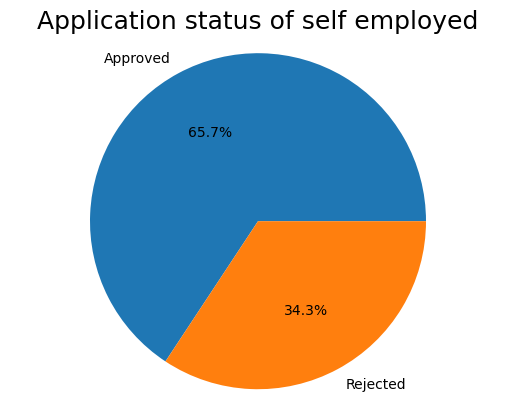

<Figure size 640x480 with 0 Axes>

In [20]:
plt.pie(self_emp['count'], labels=self_emp['Status'], autopct='%1.1f%%')
plt.title('Application status of self employed', fontsize=18)
plt.axis('equal')
plt.show()
plt.savefig('./images/self_employ1', dpi=500);

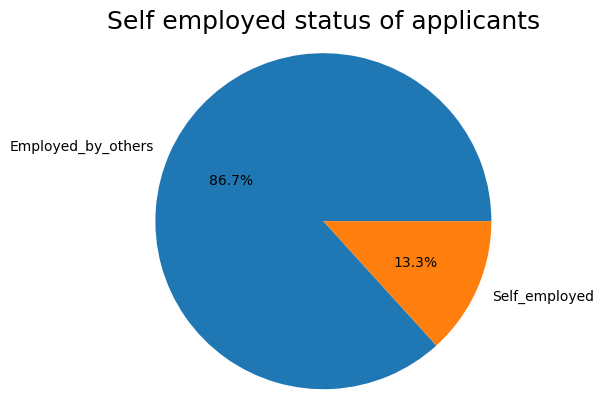

<Figure size 640x480 with 0 Axes>

In [21]:
plt.pie(app_status['count'], labels=app_status['employed_type'], autopct='%1.1f%%')
plt.title('Self employed status of applicants', fontsize=18)
plt.axis('equal')
plt.show()
plt.savefig('./images/self_employ2', dpi=500);


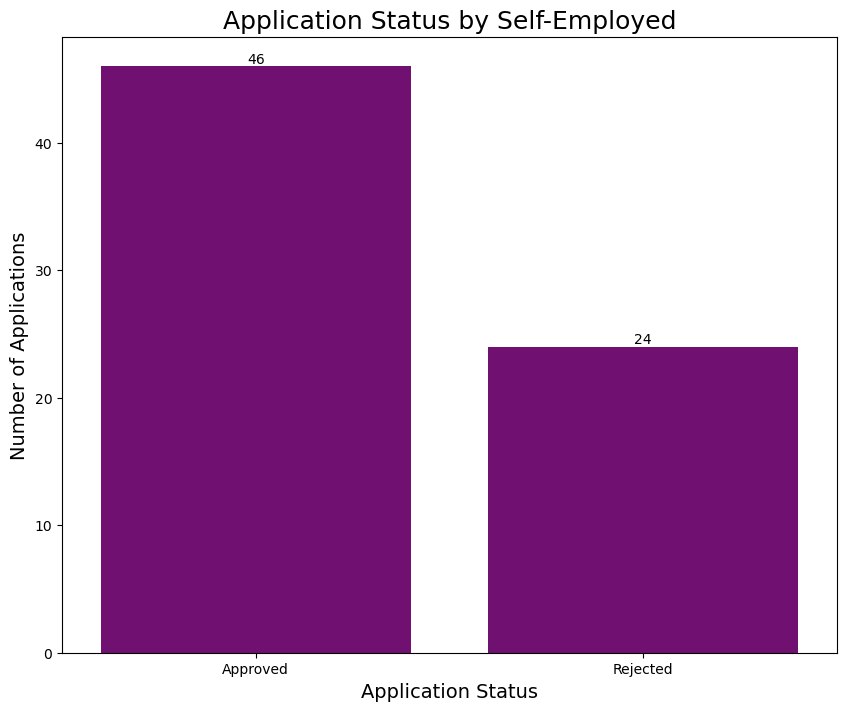

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x='Status', y='count', data=self_emp, color='purple')
plt.title('Application Status by Self-Employed', fontsize=18)
plt.xlabel('Application Status', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
ax.bar_label(ax.containers[0])
plt.savefig('./images/self_employ3', dpi=500);

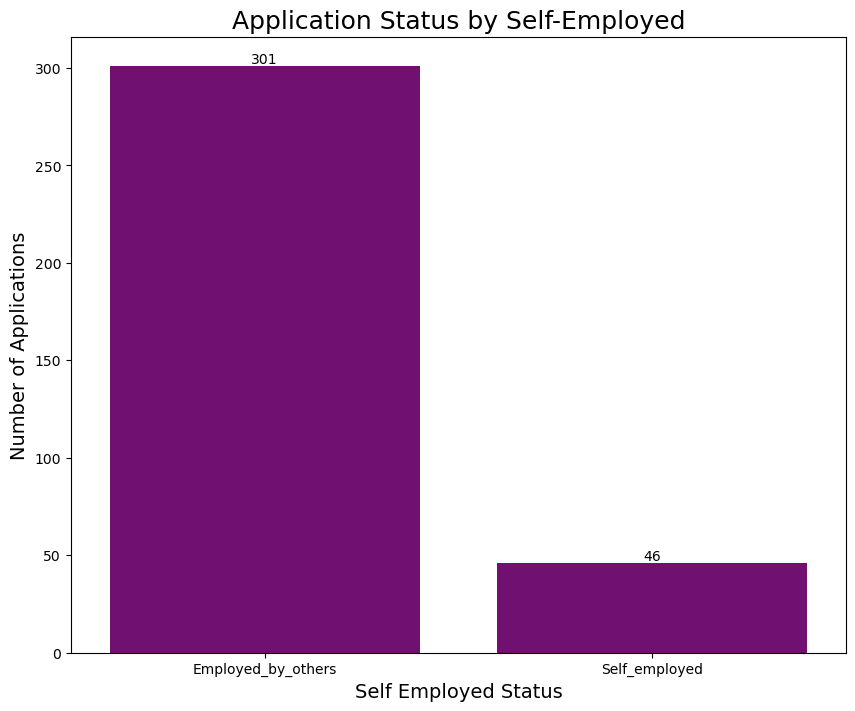

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x='employed_type', y='count', data=app_status, color='purple')
plt.title('Application Status by Self-Employed', fontsize=18)
plt.xlabel('Self Employed Status', fontsize=14)
plt.ylabel('Number of Applications', fontsize=14)
ax.bar_label(ax.containers[0])
plt.savefig('./images/self_employ4', dpi=500);

### 5.2 Application status for married men  

In [24]:
fig_checking2 = pd_loan.groupby(['Gender', 'Married', 'Application_Status'])['Application_Status'].count()
fig_checking2

Gender  Married  Application_Status
Female  No       Approved               40
                 Rejected               26
        Yes      Approved               17
                 Rejected                8
Male    No       Approved               71
                 Rejected               43
        Yes      Approved              219
                 Rejected               87
Name: Application_Status, dtype: int64

In [25]:
pd_married_male = pd_loan.loc[(pd_loan.Gender == 'Male') & (pd_loan.Married == 'Yes')]
pd_married_men = pd_married_male.groupby(['Application_Status'])['Application_Status'].count()
pd_married_men


Application_Status
Approved    219
Rejected     87
Name: Application_Status, dtype: int64

In [26]:
app_status_married_men = pd_married_male.Application_Status.value_counts()
married_men = app_status_married_men.reset_index()
married_men.columns = ['Status', 'count']

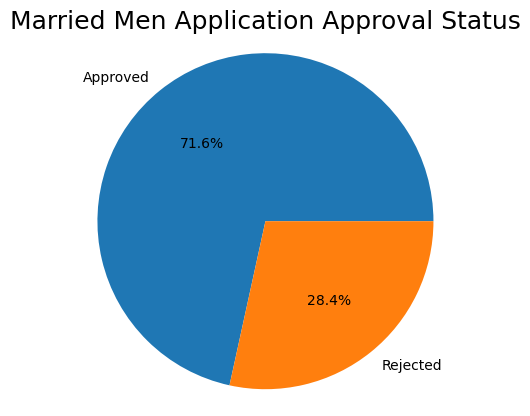

<Figure size 640x480 with 0 Axes>

In [27]:
plt.pie(married_men['count'], labels=married_men['Status'], autopct='%1.1f%%')
plt.title('Married Men Application Approval Status', fontsize=18)
plt.axis('equal')
plt.show()
plt.savefig('./images/married_men', dpi=500);

### 5.3   Top 3 Months with largest transaction data  

In [28]:
pd_credit.columns

Index(['BRANCH_CODE', 'CUST_CC_NO', 'CUST_SSN', 'DAY', 'MONTH',
       'TRANSACTION_ID', 'TRANSACTION_TYPE', 'TRANSACTION_VALUE', 'YEAR',
       'TIMEID'],
      dtype='object')

In [29]:
print(pd_credit.sort_values(by=['TIMEID'], ascending=False).head(2))
print(pd_credit.sort_values(by=['TIMEID'], ascending=True).head(2))

       BRANCH_CODE        CUST_CC_NO   CUST_SSN  DAY  MONTH  TRANSACTION_ID  \
13787           43  4210653317392678  123457286   28     12           13788   
7422            75  4210653388841064  123458478   28     12            7423   

      TRANSACTION_TYPE  TRANSACTION_VALUE  YEAR      TIMEID  
13787        Education              87.58  2018  2018-12-28  
7422             Bills              86.33  2018  2018-12-28  
       BRANCH_CODE        CUST_CC_NO   CUST_SSN  DAY  MONTH  TRANSACTION_ID  \
33193          123  4210653362839417  123453697    1      1           33194   
43679           15  4210653368958546  123451540    1      1           43680   

      TRANSACTION_TYPE  TRANSACTION_VALUE  YEAR      TIMEID  
33193       Healthcare              23.30  2018  2018-01-01  
43679              Gas              18.18  2018  2018-01-01  


In [30]:
monthly_transactions = pd_credit.groupby(['MONTH'])['TRANSACTION_VALUE'].sum()
monthly_transactions

MONTH
1     196568.87
2     201086.67
3     196488.59
4     194203.25
5     201310.26
6     195468.74
7     201199.35
8     196453.41
9     196069.44
10    202583.89
11    200549.36
12    201251.08
Name: TRANSACTION_VALUE, dtype: float64

In [31]:
month_count = monthly_transactions.reset_index()
month_count.columns = ['month', 'total_transactions']
month_count

,month,total_transactions
0,1,196568.87
1,2,201086.67
2,3,196488.59
3,4,194203.25
4,5,201310.26
5,6,195468.74
6,7,201199.35
7,8,196453.41
8,9,196069.44
9,10,202583.89


In [32]:
month_count.dtypes

month                   int64
total_transactions    float64
dtype: object

In [33]:
month_count['month'] = month_count['month'].apply(str)
month_count['month'] = month_count['month'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'], 
                          ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
#month_count.loc[:,'total_transactions'] ='$'+ month_count['total_transactions'].map('{:,.0f}'.format)
month_count

,month,total_transactions
0,Jan,196568.87
1,Feb,201086.67
2,Mar,196488.59
3,Apr,194203.25
4,May,201310.26
5,Jun,195468.74
6,Jul,201199.35
7,Aug,196453.41
8,Sept,196069.44
9,Oct,202583.89


In [34]:
top_3_months = month_count.sort_values(by=['total_transactions'], ascending=False).head(3)
top_3_months

,month,total_transactions
9,Oct,202583.89
4,May,201310.26
11,Dec,201251.08


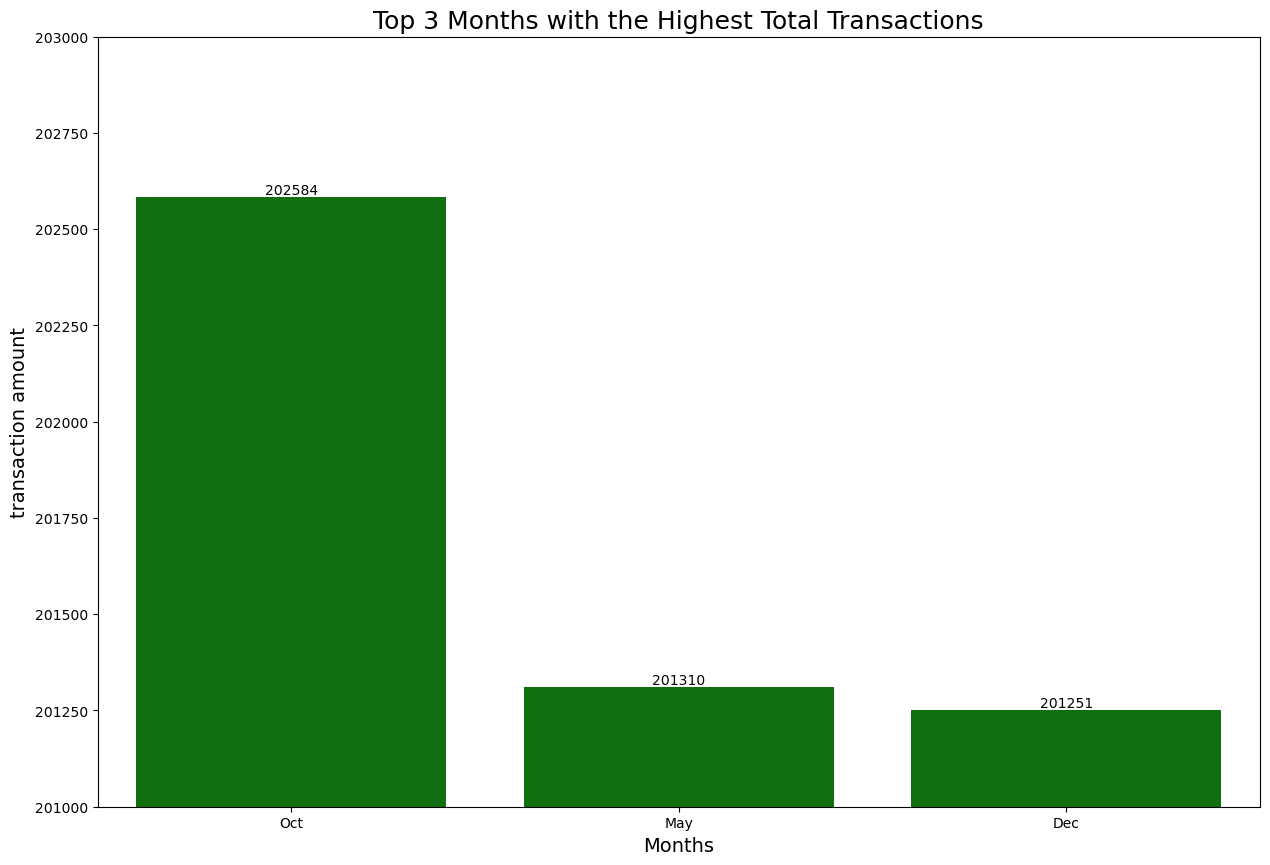

In [35]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x='month', y='total_transactions', data=top_3_months, color='green')
plt.title('Top 3 Months with the Highest Total Transactions', fontsize=18)
plt.xlabel('Months', fontsize=14)
plt.ylabel('transaction amount', fontsize=14)
plt.ylim(201000, 203000)
ax.bar_label(ax.containers[0])
plt.savefig('./images/top3months', dpi=500);

### 5.4 Top Branches for Healthcare transactions

In [36]:
healthcare_trans_pd = pd_branch_and_credit.loc[(pd_branch_and_credit.TRANSACTION_TYPE == 'Healthcare')]
healthcare_by_branch = healthcare_trans_pd.groupby(['BRANCH_CODE'])['TRANSACTION_VALUE'].sum()
healthcare_by_branch

BRANCH_CODE
1.0      2920.15
2.0      3284.31
3.0      3353.55
4.0      2436.80
5.0      2736.69
          ...   
175.0    3341.57
178.0    2957.41
180.0    2344.08
188.0    2869.18
192.0    1960.35
Name: TRANSACTION_VALUE, Length: 114, dtype: float64

In [37]:
healthcare_total_pd = healthcare_by_branch.reset_index()
healthcare_total_pd

,BRANCH_CODE,TRANSACTION_VALUE
0,1.0,2920.15
1,2.0,3284.31
2,3.0,3353.55
3,4.0,2436.80
4,5.0,2736.69
...,...,...
109,175.0,3341.57
110,178.0,2957.41
111,180.0,2344.08
112,188.0,2869.18


In [38]:
#names are all the same
healthcare_tran_df = pd_branch_and_credit[['BRANCH_CODE', 'TRANSACTION_VALUE', 'BRANCH_NAME']].copy()
healthcare_tran_df

,BRANCH_CODE,TRANSACTION_VALUE,BRANCH_NAME
0,1.0,53.03,Example Bank
1,1.0,58.78,Example Bank
2,1.0,5.49,Example Bank
3,1.0,42.26,Example Bank
4,1.0,6.65,Example Bank
...,...,...,...
46690,192.0,49.85,Example Bank
46691,192.0,62.73,Example Bank
46692,192.0,65.54,Example Bank
46693,192.0,92.44,Example Bank


In [39]:
pd_branch['BRANCH_NAME'].value_counts()

Example Bank    115
Name: BRANCH_NAME, dtype: int64

In [40]:
top_branch_for_healthcare_trans = healthcare_total_pd.sort_values(by=['TRANSACTION_VALUE'], ascending=False).head(1)
top_branch_for_healthcare_trans

,BRANCH_CODE,TRANSACTION_VALUE
22,25.0,4370.18


In [41]:
top_branch_3_for_healthcare_trans = healthcare_total_pd.sort_values(by=['TRANSACTION_VALUE'], ascending=False).head(3)
top_branch_3_for_healthcare_trans

,BRANCH_CODE,TRANSACTION_VALUE
22,25.0,4370.18
53,60.0,4072.04
69,83.0,4003.37


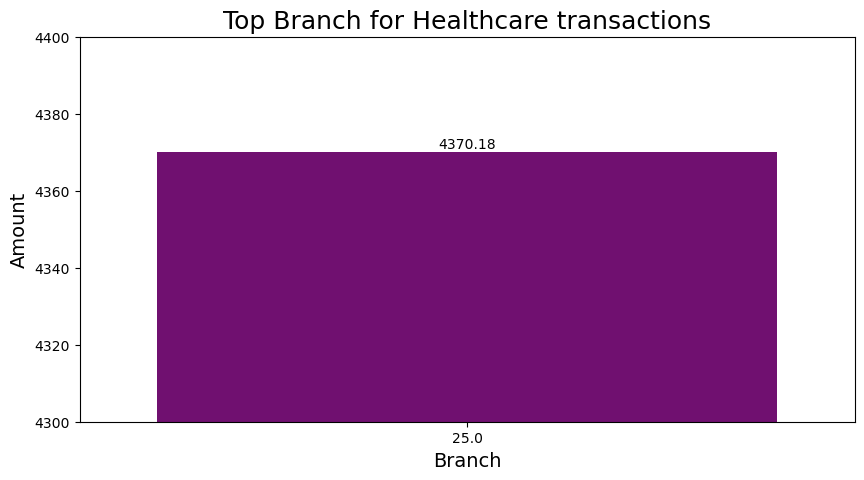

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE', data=top_branch_for_healthcare_trans, color='purple')
plt.title('Top Branch for Healthcare transactions', fontsize=18)
plt.xlabel('Branch', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.ylim(4300, 4400)
ax.bar_label(ax.containers[0])
plt.savefig('./images/top_branch_healthcare', dpi=500);

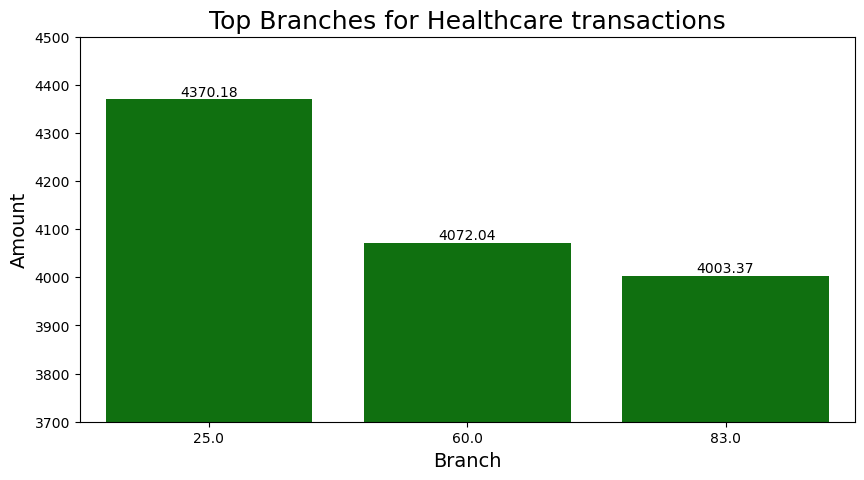

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='BRANCH_CODE', y='TRANSACTION_VALUE', data=top_branch_3_for_healthcare_trans, color='green')
plt.title('Top Branches for Healthcare transactions', fontsize=18)
plt.xlabel('Branch', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.ylim(3700, 4500)
ax.bar_label(ax.containers[0])
plt.savefig('./images/top_3_branch_healthcare', dpi=500);

In [44]:
spark.stop()